In [6]:
# manipulate and analyze structured data, like tabular data.
import pandas as pd
#mathematical functions to perform numerical computations efficiently.
import numpy as np
#create various types of plots and charts, such as line plots, bar plots, histograms, and more.
import matplotlib.pyplot as plt
#creating complex visualizations and provides additional statistical features.
import seaborn as sns

In [7]:
dataset = pd.read_csv("C:/Users/HP/OneDrive/Desktop//data.csv")

In [8]:
dataset

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [9]:
 #specifying that you want to rename the column with the current name "sr.1" to the new name "sr1"
dataset.rename(columns={"sr.1":"sr1"},inplace=True)

In [10]:
dataset.head()

,sr,rr,t,lm,bo,rem,sr1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr1     630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [12]:
dataset.describe()

,sr,rr,t,lm,bo,rem,sr1,hr,sl
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


<AxesSubplot:xlabel='sl', ylabel='count'>

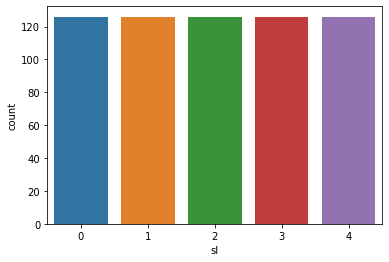

In [13]:
#it will show the count of each unique value in the specified column.
sns.countplot (x='sl',data=dataset)

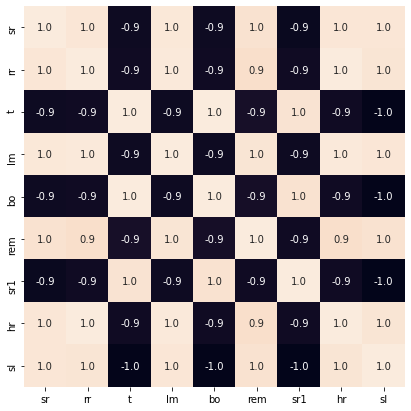

In [14]:
# Values in the correlation matrix range between -1 and 1, where 1 indicates a strong positive correlation, -1 indicates a strong negative correlation, and 0 indicates no correlation.
plt.figure(figsize=(9,7))
sns.heatmap(dataset.corr(), annot=True, square=True, fmt='.1f', cbar=False);

In [15]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
#evaluating the effectiveness of classification models
from sklearn.metrics import confusion_matrix , classification_report

In [16]:
#The dropped column 'sl' is removed from x
x = dataset.copy().drop('sl',axis=1).to_numpy()
#separate the target variabl
y = dataset.copy()['sl'].to_numpy()

In [17]:
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.8,test_size=0.2)

In [18]:
model = tree.DecisionTreeClassifier()
model = model.fit(x_train,y_train)

[Text(239.14285714285714, 199.32, 'rem <= 99.96\ngini = 0.799\nsamples = 504\nvalue = [102, 100, 106, 89, 107]'),
 Text(191.31428571428572, 163.07999999999998, 't <= 96.012\ngini = 0.749\nsamples = 397\nvalue = [102, 100, 106, 89, 0]'),
 Text(143.4857142857143, 126.83999999999999, 't <= 94.008\ngini = 0.665\nsamples = 295\nvalue = [0, 100, 106, 89, 0]'),
 Text(95.65714285714286, 90.6, 'bo <= 89.984\ngini = 0.501\nsamples = 196\nvalue = [0, 1, 106, 89, 0]'),
 Text(47.82857142857143, 54.359999999999985, 'gini = 0.0\nsamples = 89\nvalue = [0, 0, 0, 89, 0]'),
 Text(143.4857142857143, 54.359999999999985, 'rem <= 82.5\ngini = 0.019\nsamples = 107\nvalue = [0, 1, 106, 0, 0]'),
 Text(95.65714285714286, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0]'),
 Text(191.31428571428572, 18.119999999999976, 'gini = 0.0\nsamples = 106\nvalue = [0, 0, 106, 0, 0]'),
 Text(191.31428571428572, 90.6, 'gini = 0.0\nsamples = 99\nvalue = [0, 99, 0, 0, 0]'),
 Text(239.14285714285714, 126.839

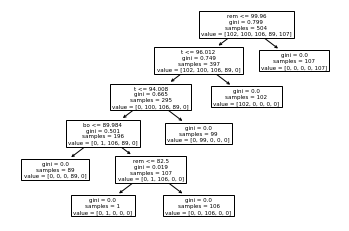

In [19]:
tree.plot_tree(model,feature_names=['sr','rr','t','lm','bo','rem','sr1','hr'])

In [20]:
preds = model.predict(x_test)

In [21]:
conf_metrics = confusion_matrix(y_test,preds)

<AxesSubplot:>

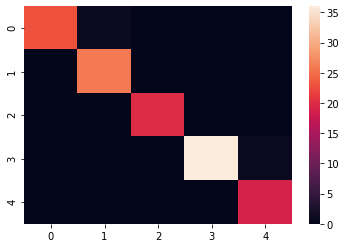

In [22]:
sns.heatmap(conf_metrics)

In [23]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.96      1.00      0.98        26
           2       1.00      1.00      1.00        20
           3       1.00      0.97      0.99        37
           4       0.95      1.00      0.97        19

    accuracy                           0.98       126
   macro avg       0.98      0.99      0.98       126
weighted avg       0.98      0.98      0.98       126



In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score


accuracy = accuracy_score(y_test, preds)
print("Accuracy: " + str(accuracy))

Accuracy: 0.9841269841269841


No handles with labels found to put in legend.


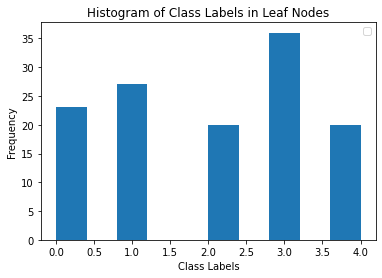

In [26]:
plt.scatter
plt.hist(preds)
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.title('Histogram of Class Labels in Leaf Nodes')
plt.legend()
plt.show()
dataset.copy().drop('sl',axis=1).to_numpy()
y = dataset.copy()['sl'].to_numpy()



In [81]:
from sklearn.metrics import confusion_matrix


In [82]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 5,  6,  2,  4,  6],
       [ 3, 10,  5,  5,  7],
       [ 6,  5,  5,  6,  3],
       [ 4,  8,  5,  2,  1],
       [ 3,  5,  8,  6,  6]], dtype=int64)